# i. Perkenalan

---
Nama    : Maulana Muhamad Priadhi

Batch   : HCK-007

Membuat model supervised learning untuk memprediksi nasabah berlanganan deposito pada bank

---

## Objective:

1. Membuat model untuk memprediksi nasabah yang akan berlangganan deposito dari data yang diberikan.

2. Mampu memprediksi nasabah yang akan berlangganan deposito.

3. Menganalisis hasil campaign yang telah dilakukan.

4. Memberikan saran bisnis untuk marketing campaign selanjutnya.

## Conceptual Problem

1. `**Jelaskan latar belakang adanya bagging dan cara kerja bagging !**`

Bagging adalah teknik ensemble learning dalam machine learning yang digunakan untuk meningkatkan stabilitas dan kinerja model. Bagging digunakan untuk mengatasi overfitting. 

Cara kerja:

- Mengambil sampel model secara acak dari Train-set. 
- Setiap sampel dilatih dengan model yang sama.
- Setiap model akan memberikan hasil yang berbeda
- Hasil dari setiap model akan diagregasi untuk menghasilkan hasil akhir yang terbaik

2. `**Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**`

Random Forest:

Membuat model pohon independen secara paralel dan mengambil hasil akhir dari beberapa pohon independen dengan cara voting atau mayoritas suara yang terpilih.

Boosting:

Membuat model berurutan yang mengevaluasi error atau memberikan fokus lebih pada data yang sulit diolah dari hasil prediksi model sebelumnya hingga memberikan hasil akhir yang terbaik.

3. `**Jelaskan apa yang dimaksud dengan Cross Validation !**`

Teknik dalam machine learning yang digunakan untuk mengevaluasi kinerja model machine learning. Tujuannya adalah untuk mengukur performa model secara objektif. Dalam pelaksanaannya, data akan dibagi menjadi beberapa bagian dan melakukan pelatihan dan pengujian secara bergantian 
dan kemudian dilakukan penilaian dari hasil pengujian. Hal ini akan diulang sebanyak permintaan.

## Table Information

1. Id : customer ID
2. age : customer age
3. job : customer occupation
4. marital : marital status
5. education : last education
6. default : credit in default
7. balance : average yearly balance (EUR)
8. housing : housing loan
9. loan : personal loan

**related with the last contact of the current campaign**

10. contact : contact communication type
11. day : last contact day of the month
12. month : last contact month of the year
13. duration :last contact duration (in seconds)

**other attributes**

14. campaign : number of contacts performed during this campaign and for this client
15. pdays : number of days passed after this client was last contacted from previous campaign
16. previous : number of contacts performed before this campaign and for this client
17. poutcome : outcome of the previous marketing campaign
18. y : client subscribe a term deposit

# ii. Import Libraries

In [1]:
# data exploration
import pandas as pd

# komputasi array, statistics & plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# preprocessing
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model training & evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# inference
import pickle

import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

### Loading

In [2]:
# loading csv data
df = pd.read_csv('Predict-term-deposit.csv')

df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Overview

In [3]:
# melihat shape dataset
df.shape

(45211, 18)

In [4]:
# melihat nama-nama kolom
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# deskriptif statistik dari dataset
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# informasi umum dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [8]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [7]:
# cek missing value
df.isnull().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# cek data duplikat
df[df.duplicated()].shape

(0, 18)

In [9]:
# Menemukan indeks baris dengan umur 999 atau -1
umur_aneh = df[(df['age'] == 999) | (df['age'] == -1)].index

umur_aneh

Index([0, 45203, 45204, 45205], dtype='int64')

In [10]:
# melihat 
cat_col = df.select_dtypes(include=['object']).columns.tolist()

for i in cat_col:
    print(df[i].value_counts())
    print('-'*30)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
------------------------------
default
no     44396
yes      815
Name: count, dtype: int64
------------------------------
housing
yes    25130
no     20081
Name: count, dtype: int64
------------------------------
loan
no     37967
yes     7244
Name: count, dtype: int64
------------------------------
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
------------------------------
month
may    13766
ju

In [11]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

### Data Cleaning

In [12]:
df = df.dropna()

df.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# mengubah target menjadi angka
df['y'] = df['y'].replace({'yes': 1, 'no': 0})
df['y'] = df['y'].astype('int64')

In [14]:
# mengubah kolom di bawah menjadi angka
biner = ['default', 'housing', 'loan']
for i in biner:
    df[i] = df[i].replace({'yes': 1, 'no': 0})
    print(i, df[i].nunique())

default 2
housing 2
loan 2


In [15]:
# melihat perubahan misval dan dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45200 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45200 non-null  int64  
 1   age        45200 non-null  float64
 2   job        45200 non-null  object 
 3   marital    45200 non-null  object 
 4   education  45200 non-null  object 
 5   default    45200 non-null  int64  
 6   balance    45200 non-null  float64
 7   housing    45200 non-null  int64  
 8   loan       45200 non-null  int64  
 9   contact    45200 non-null  object 
 10  day        45200 non-null  int64  
 11  month      45200 non-null  object 
 12  duration   45200 non-null  int64  
 13  campaign   45200 non-null  int64  
 14  pdays      45200 non-null  int64  
 15  previous   45200 non-null  int64  
 16  poutcome   45200 non-null  object 
 17  y          45200 non-null  int64  
dtypes: float64(2), int64(10), object(6)
memory usage: 6.6+ MB


In [16]:
df['age'].unique()

array([999.,  44.,  33.,  47.,  35.,  28.,  41.,  29.,  53.,  58.,  57.,
        51.,  45.,  60.,  56.,  32.,  25.,  40.,  39.,  52.,  46.,  36.,
        49.,  59.,  37.,  50.,  54.,  55.,  48.,  31.,  43.,  42.,  30.,
        27.,  34.,  38.,  23.,  26.,  61.,  22.,  24.,  21.,  20.,  66.,
        62.,  83.,  75.,  67.,  70.,  65.,  68.,  64.,  69.,  72.,  71.,
        19.,  76.,  85.,  63.,  90.,  82.,  73.,  74.,  78.,  80.,  94.,
        79.,  77.,  86.,  95.,  81.,  18.,  89.,  84.,  87.,  92.,  93.,
        88.,  -1.])

In [17]:
df.drop(umur_aneh, inplace=True)

In [18]:
urutan_bulan = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',  'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=urutan_bulan, ordered=True)

In [19]:
df['month'].unique()

['may', 'jun', 'jul', 'aug', 'oct', ..., 'jan', 'feb', 'mar', 'apr', 'sep']
Length: 12
Categories (12, object): ['jan' < 'feb' < 'mar' < 'apr' ... 'sep' < 'oct' < 'nov' < 'dec']

In [20]:
# membuat copied file
df_clean = df.copy()

# iv. Exploratory Data Analysis (EDA)

In [21]:
df_clean.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

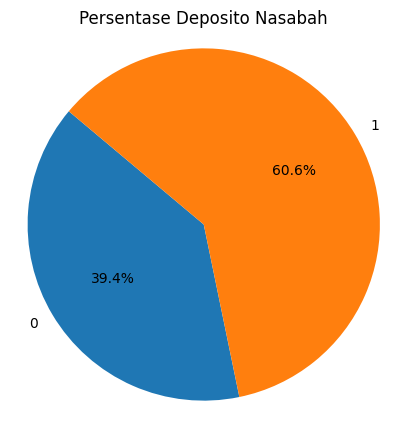

In [22]:
# pie chart deposito

deposit_pie = df_clean.groupby('y')['Id'].mean()

# data untuk pie chart
labels = deposit_pie.index
sizes = deposit_pie.values

# membuat plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Deposito Nasabah')
plt.axis('equal')  # memastikan pie chart berbentuk lingkaran

# menampilkan pie chart
plt.show()

Pada data ini persentase nasabah yang berlangganan deposito 60.7%, 21.4% lebih banyak dari nasabah yang tidak berlangganan

<Axes: xlabel='month', ylabel='campaign'>

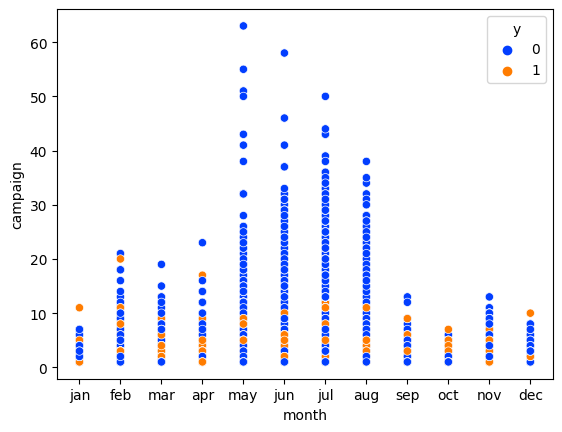

In [23]:
# scatter plot campaing-month
sns.scatterplot(data=df_clean, y="campaign", x="month", hue="y",palette="bright")

- Nasabah yang dihubungi lebih sedikit dalam promosi produk deposito lebih banyak yang berlangganan dibanding nasabah yang dihubungi lebih sering

<Axes: xlabel='marital', ylabel='age'>

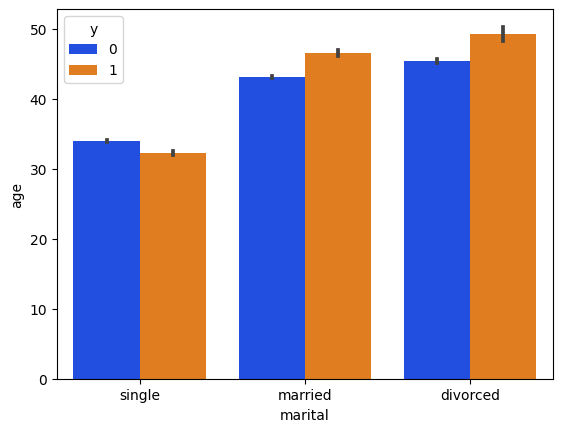

In [24]:
# barplot status-age
sns.barplot(data=df_clean, x="marital", y="age", hue="y",palette="bright")

- Rata-rata umur nasabah memiliki rentang anatara 30 sampai 50 tahun
- Nasabah dengan status cerai lebih banyak yang sudah berlangganan deposito, sedangkan nasabah dengan status single lebih banyak yang tidak berlangganan deposito

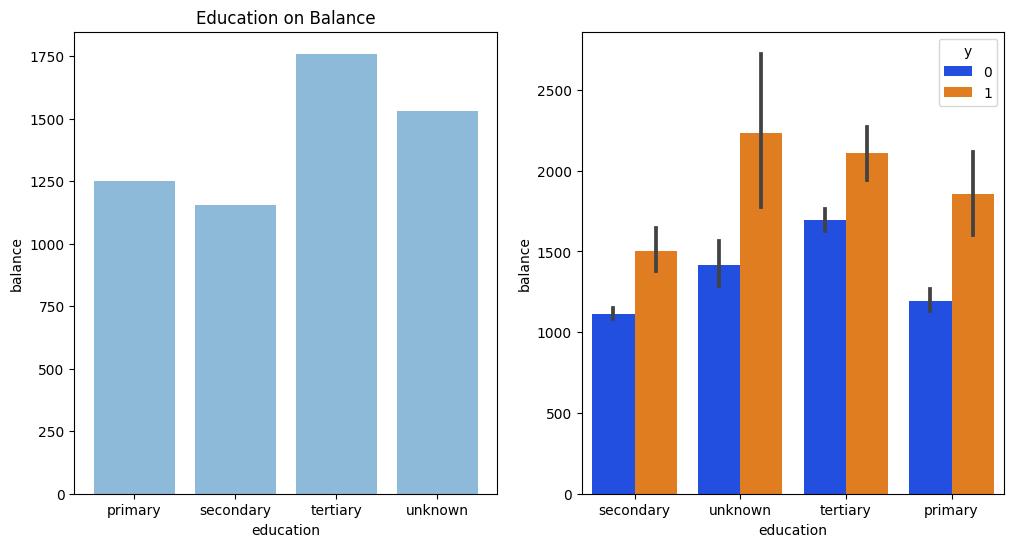

In [25]:
plt.figure(figsize=(12, 6))

# barplot education-balance
plt.subplot(1,2,1)
average_purchases = df_clean.groupby('education')['balance'].mean()
plt.bar(average_purchases.index, average_purchases.values, alpha=0.5)
plt.xlabel('education')
plt.ylabel('balance')
plt.title('Education on Balance')

# same but with y hue
plt.subplot(1,2,2)
sns.barplot(data=df_clean, x="education", y="balance", hue="y",palette="bright")

plt.show()

- Nasabah  dengan latar pendidkan perguruan tinggi memiliki lebih banyak saldo di dalam akunnya, sedangkan dengan latar belakang sekolah menengah  memiliki saldo paling sedikit
- Nasabah yang berlangganan produk deposito paling banyak terdapat pada nasabah dengan latar pendidikan yang tidak disebutkan dan dengan latar perguruan tinggi

Text(0.5, 1.0, 'Hasil Campaign Sebelumnya')

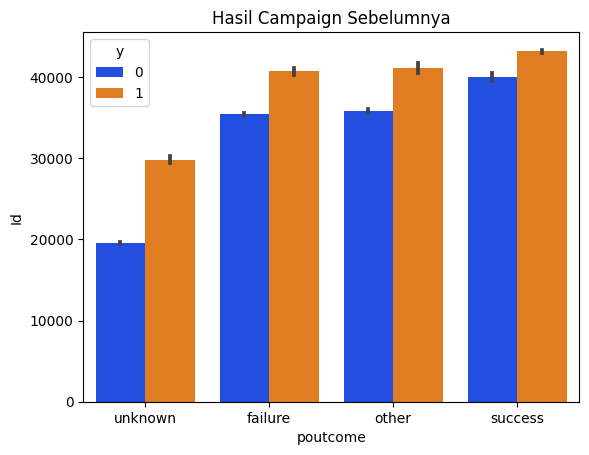

In [26]:
# last campaign outcome with y hue
sns.barplot(data=df_clean, x="poutcome", y="Id", hue="y",palette="bright")
plt.title('Hasil Campaign Sebelumnya')

- Nasabah yang gagal berlangganan pada campaign sebelumnya, berhasil berlangganan pada campaign sekarang.
- Nasabah yang bukan target pada campaign sebelumnya, berhasil berlangganan pada campaign sekarang.


In [27]:
# memisahkan kolom numerik dan kategori
numcol = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
catcol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

# v. Feature Engineering

### Splitting Data

In [28]:
# split data
X = df.drop(['Id', 'y'], axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(31637, 16)
(13559, 16)
(31637,)
(13559,)


In [29]:
# membuat variabel baru untuk data train numerical
X_train_num = X_train[numcol]
X_test_num = X_test[numcol]

# membuat variabel baru untuk data train categorical
X_train_cat = X_train[catcol]
X_test_cat = X_test[catcol]

In [30]:
# menggabungkan X train dan y train untuk dilakukan eda
df_eda = pd.concat([X_train, y_train], axis=1)

In [31]:
# menghitung perbandingan nilai target
y_train.value_counts()

y
0    27937
1     3700
Name: count, dtype: int64

## EDA Modeling

### Handling Outliers

In [32]:
# Cek distribusi data menggunakan skewness
for i in X_train_num :
    skew = X_train_num[i].skew()

    print('Skewness dari', i ,'adalah', skew )

Skewness dari age adalah 0.6822737396920298
Skewness dari balance adalah 8.829310580733582
Skewness dari day adalah 0.09732987739174792
Skewness dari duration adalah 3.2872486599775326
Skewness dari campaign adalah 5.052206248806004
Skewness dari pdays adalah 2.596675926186893
Skewness dari previous adalah 48.45271540394893


In [33]:
# menghitung data outlier
for i in X_train_num:
    skew = X_train_num[i].skew()
    if skew >0.5 and skew <= 1:

        q1 = X_train_num[i].quantile(0.25)
        q3 = X_train_num[i].quantile(0.75)
        iqr = q3-q1

        upper_boundary = q3 + (1.5*iqr)
        lower_boundary = q1 - (1.5*iqr)

    elif skew >1 :

        q1 = X_train_num[i].quantile(0.25)
        q3 = X_train_num[i].quantile(0.75)
        iqr = q3-q1

        upper_boundary = q3 + (3*iqr)
        lower_boundary = q1 - (3*iqr)
        



    outlier = X_train_num[(X_train_num[i]>upper_boundary)|((X_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(X_train_num)*100

    print('Presentase outlier dari', i ,'adalah', persen_outlier, '%')


Presentase outlier dari age adalah 0.7617662863103328 %
Presentase outlier dari balance adalah 5.433511394885735 %
Presentase outlier dari day adalah 0.0 %
Presentase outlier dari duration adalah 2.5950627429908018 %
Presentase outlier dari campaign adalah 3.265164206467111 %
Presentase outlier dari pdays adalah 18.06429181022221 %
Presentase outlier dari previous adalah 18.06429181022221 %


In [34]:
# # capping with winsorizer
# outlier = ['balance', 'duration']
# nonoutlier = ['age', 'day', 'campaign', 'pdays', 'previous']
# wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables= outlier)

# X_train_capped = wins.fit_transform(X_train_num[outlier])
# X_test_capped = wins.transform(X_test_num[outlier])

# X_train_capped = pd.concat([X_train_capped, X_train_num[nonoutlier]], axis=1)
# X_test_capped = pd.concat([X_test_capped, X_train_num[nonoutlier]], axis=1)

- Saya hanya akan melakukan capping pada kolom balance dan duration karena dikhawatirkan akan menghilangkan informasi yang penting jika kolom lainnya dilakukan capping

### Scaling

In [35]:
# # scaling with MinMaxScaler
# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train_capped)
# X_test_scaled = scaler.fit_transform(X_test_capped)

# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)

- Scaling menggunakan MinMaxScaler

### Feature Selection

In [36]:
# # menggabungkan kolom menjadi satu untuk cek korelasi
# df_fs = pd.concat([X_train_scaled, X_train_cat, y_train], axis=1)

#### Phik Matrix

In [37]:
# Mendefinisi phik matrix dan kolom yang digunakan
phik_matrix = df_eda.phik_matrix()

# Memilih kolom target yang akan dibandingkan
correlation_with_y = phik_matrix['y'].sort_values(ascending=False)

correlation_with_y

interval columns not set, guessing: ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


y            1.000000
poutcome     0.468151
duration     0.364937
month        0.332569
pdays        0.253883
age          0.210952
housing      0.209555
job          0.169950
education    0.109972
loan         0.106411
day          0.099709
contact      0.091262
campaign     0.066052
balance      0.058881
marital      0.038091
default      0.028448
previous     0.018639
Name: y, dtype: float64

Dari hasil korelasi phik matrix, saya akan mengambil kolom yang akan digunakan untuk pembuatan model, yaitu

    `poutcome, duration, balance, pdays, age, job, education, housing, loan`
    
Walaupun balance tidak memiliki korelasi yang tinggi, tapi menurut saya saldo pada akun nasabah merupakan pertimbangan yang penting dalam prediksi deposito nasabah.

## Pipeline

In [38]:
# pipeline numerik 1 (scaling)
num_pipeline = Pipeline([
       ('scaler', MinMaxScaler())
    ])

num_pipeline1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['pdays', 'age']])

num_tr1 = num_pipeline1.fit_transform(X_train[['duration', 'balance']])


In [39]:
# pipeline kategorikal 1 (OHE)
cat_pipeline = Pipeline([
     ('encoder', OneHotEncoder())
    ])

# pipeline kategorikal 2 (Ord)
cat_pipeline1 = Pipeline([
     ('ordinal', OrdinalEncoder())
    ])

# pipeline kategorikal 3 (Pass)
cat_pipeline2 = Pipeline([
    ('passthrough', None)
])

cat_tr = cat_pipeline.fit_transform(X_train[['poutcome', 'job']])
cat_tr_array = np.array(cat_tr)

cat_tr1 = cat_pipeline1.fit_transform(X_train[['education']])
cat_tr_array1 = np.array(cat_tr1)

cat_tr2 = cat_pipeline1.fit_transform(X_train[['housing', 'loan']])
cat_tr_array1 = np.array(cat_tr2)

In [40]:
# menggabungkan 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['pdays', 'age']),
        ("num1", num_pipeline1, ['duration', 'balance']),
        ("cat", cat_pipeline, ['poutcome', 'job']),
        ("cat1", cat_pipeline1, ['education']),
        ("cat2", cat_pipeline2, ['housing', 'loan'])
    ])

# Melihat hasil pipeline train
X_train_finals = full_pipeline.fit_transform(X_train)
X_train_finals


X_test_finals = full_pipeline.transform(X_test)

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['pdays', 'age']),
                                ('num1',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['duration', 'balance']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['poutcome', 'job']),
                                ('cat1',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['education']),
                                ('cat2',
                                 Pipeline(steps=[('passthrough', None)]),
                                 ['housing', 'loan'])])

### SMOTE

In [41]:
# melakukan under sampling agar data  seimbang
smote = RandomUnderSampler(sampling_strategy=1, random_state=4)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_finals, y_train)
y_train_balanced.value_counts()

X_train_balanced = pd.DataFrame(X_train_balanced)
y_train_balanced = pd.DataFrame(y_train_balanced)

y_train_balanced.value_counts()

X_train_balanced

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.246753,0.149300,0.361900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,0.377294,0.207792,0.220840,0.586439,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.844156,0.311042,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.181818,0.209953,0.370941,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.000000,0.246753,0.208398,0.427030,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0.000000,0.545455,0.909798,0.244004,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7396,0.321101,0.545455,0.269051,0.555074,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7397,0.000000,0.298701,1.000000,0.958579,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7398,0.000000,0.337662,0.640747,0.384225,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


# vi. Model Definition

In [42]:
# mendefinisikan model
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
ab = AdaBoostClassifier()

# vii. Model Training

## Baseline Model

In [43]:
# merapikan dataframe untuk dilatih pada model
X_train_balanced_new = np.ascontiguousarray(X_train_balanced)
X_test_new = np.ascontiguousarray(X_test_finals)

In [44]:
# training model svm
svm.fit(X_train_balanced, y_train_balanced)

svm_train = svm.predict(X_train_balanced)
svm_test = svm.predict(X_test_finals)

print('Train-Set', classification_report(y_train_balanced, svm_train))
print('Test-Set', classification_report(y_test, svm_test))

Train-Set               precision    recall  f1-score   support

           0       0.81      0.82      0.81      3700
           1       0.81      0.81      0.81      3700

    accuracy                           0.81      7400
   macro avg       0.81      0.81      0.81      7400
weighted avg       0.81      0.81      0.81      7400

Test-Set               precision    recall  f1-score   support

           0       0.97      0.81      0.88     11973
           1       0.36      0.79      0.49      1586

    accuracy                           0.81     13559
   macro avg       0.66      0.80      0.69     13559
weighted avg       0.90      0.81      0.84     13559



In [45]:
# training model knn
knn.fit(X_train_balanced_new, y_train_balanced)

knn_train = knn.predict(X_train_balanced_new)
knn_test = knn.predict(X_test_new)

print('Train-Set', classification_report(y_train_balanced, knn_train))
print('Test-Set', classification_report(y_test, knn_test))

Train-Set               precision    recall  f1-score   support

           0       0.84      0.84      0.84      3700
           1       0.84      0.84      0.84      3700

    accuracy                           0.84      7400
   macro avg       0.84      0.84      0.84      7400
weighted avg       0.84      0.84      0.84      7400

Test-Set               precision    recall  f1-score   support

           0       0.96      0.78      0.86     11973
           1       0.32      0.77      0.45      1586

    accuracy                           0.78     13559
   macro avg       0.64      0.78      0.66     13559
weighted avg       0.89      0.78      0.82     13559



In [46]:
# training model Random Forest
rf.fit(X_train_balanced_new, y_train_balanced)

rf_train = rf.predict(X_train_balanced_new)
rf_test = rf.predict(X_test_new)

print('Train-Set', classification_report(y_train_balanced, rf_train))
print('Test-Set', classification_report(y_test, rf_test))

Train-Set               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00      3700

    accuracy                           1.00      7400
   macro avg       1.00      1.00      1.00      7400
weighted avg       1.00      1.00      1.00      7400

Test-Set               precision    recall  f1-score   support

           0       0.97      0.80      0.88     11973
           1       0.35      0.81      0.49      1586

    accuracy                           0.80     13559
   macro avg       0.66      0.81      0.68     13559
weighted avg       0.90      0.80      0.83     13559



In [47]:
# training model Decision Tree
dt.fit(X_train_balanced_new, y_train_balanced)

dt_train = dt.predict(X_train_balanced_new)
dt_test = dt.predict(X_test_new)

print('Train-Set', classification_report(y_train_balanced, dt_train))
print('Test-Set', classification_report(y_test, dt_test))

Train-Set               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00      3700

    accuracy                           1.00      7400
   macro avg       1.00      1.00      1.00      7400
weighted avg       1.00      1.00      1.00      7400

Test-Set               precision    recall  f1-score   support

           0       0.95      0.75      0.84     11973
           1       0.28      0.72      0.40      1586

    accuracy                           0.75     13559
   macro avg       0.62      0.74      0.62     13559
weighted avg       0.87      0.75      0.79     13559



In [48]:
# training model dengan Ada Boosting
ab.fit(X_train_balanced_new, y_train_balanced)

ab_train = ab.predict(X_train_balanced_new)
ab_test = ab.predict(X_test_new)

print('Train-Set', classification_report(y_train_balanced, ab_train))
print('Test-Set', classification_report(y_test, ab_test))

Train-Set               precision    recall  f1-score   support

           0       0.82      0.82      0.82      3700
           1       0.82      0.81      0.82      3700

    accuracy                           0.82      7400
   macro avg       0.82      0.82      0.82      7400
weighted avg       0.82      0.82      0.82      7400

Test-Set               precision    recall  f1-score   support

           0       0.97      0.82      0.89     11973
           1       0.37      0.80      0.50      1586

    accuracy                           0.82     13559
   macro avg       0.67      0.81      0.70     13559
weighted avg       0.90      0.82      0.84     13559



- setelah dilakukan training pada seluruh model, didapatkan data yang overfit pada semua model
- akan dilakukan cross validation untuk mengetahui performa model lebih lanjut

#### Cross Validation

In [49]:
# cross validation pada model svm
recall_train_cross_val_svm = cross_val_score(
    svm, X_train_balanced_new, y_train_balanced, cv=5, scoring="recall")

print('F1 Score - All - Cross Validation  : ', recall_train_cross_val_svm)
print('F1 Score - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('F1 Score - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('F1 Score - Range of Test-Set       : ',
      (recall_train_cross_val_svm.mean() - recall_train_cross_val_svm.std()), '-',
      (recall_train_cross_val_svm.mean() + recall_train_cross_val_svm.std()))

Recall Score - All - Cross Validation  :  [0.79594595 0.81081081 0.77702703 0.81081081 0.8027027 ]
Recall Score - Mean - Cross Validation :  0.7994594594594595
Recall Score - Std - Cross Validation  :  0.01252025386151406
Recall Score - Range of Test-Set       :  0.7869392055979455 - 0.8119797133209735


In [50]:
# cross validation pada model KNN
recall_train_cross_val_knn = cross_val_score(
    knn, X_train_balanced_new, y_train_balanced, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_knn)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_knn.mean() - recall_train_cross_val_knn.std()), '-',
      (recall_train_cross_val_knn.mean() + recall_train_cross_val_knn.std()))

Recall Score - All - Cross Validation  :  [0.77297297 0.76486486 0.74459459 0.75945946 0.77297297]
Recall Score - Mean - Cross Validation :  0.7629729729729731
Recall Score - Std - Cross Validation  :  0.010523201261584722
Recall Score - Range of Test-Set       :  0.7524497717113884 - 0.7734961742345577


In [51]:
# cross validation pada model Random Forest
recall_train_cross_val_rf = cross_val_score(
    rf, X_train_balanced_new, y_train_balanced, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_rf)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_rf.mean() - recall_train_cross_val_rf.std()), '-',
      (recall_train_cross_val_rf.mean() + recall_train_cross_val_rf.std()))

Recall Score - All - Cross Validation  :  [0.81891892 0.81756757 0.81081081 0.82837838 0.80945946]
Recall Score - Mean - Cross Validation :  0.817027027027027
Recall Score - Std - Cross Validation  :  0.006762160001727995
Recall Score - Range of Test-Set       :  0.810264867025299 - 0.823789187028755


In [52]:
# cross validation pada model Decision Tree
recall_train_cross_val_dt = cross_val_score(
    dt, X_train_balanced_new, y_train_balanced, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_dt.mean() - recall_train_cross_val_dt.std()), '-',
      (recall_train_cross_val_dt.mean() + recall_train_cross_val_dt.std()))

Recall Score - All - Cross Validation  :  [0.72972973 0.73783784 0.73108108 0.75       0.72837838]
Recall Score - Mean - Cross Validation :  0.7354054054054053
Recall Score - Std - Cross Validation  :  0.00799013270221324
Recall Score - Range of Test-Set       :  0.7274152727031921 - 0.7433955381076186


In [53]:
# cross validation pada model Ada Boosting
recall_train_cross_val_ab = cross_val_score(
    ab, X_train_balanced_new, y_train_balanced, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_ab)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_ab.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_ab.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_ab.mean() - recall_train_cross_val_ab.std()), '-',
      (recall_train_cross_val_ab.mean() + recall_train_cross_val_ab.std()))

Recall Score - All - Cross Validation  :  [0.7972973  0.80945946 0.78648649 0.80135135 0.79594595]
Recall Score - Mean - Cross Validation :  0.7981081081081081
Recall Score - Std - Cross Validation  :  0.007480190542215162
Recall Score - Range of Test-Set       :  0.7906279175658929 - 0.8055882986503232


- dari seluruh model, hasil terbaik didapatkan pada model Random Forest Classifier
- semakin kecil nilai standar deviasi, semakin bagus. pada model RF, nilai std adalah 0.0069 dan merupakan kedua terendah. yang terendah terdapat pada model Decision Tree
- nilai range semakin mendekati 1 maka semakin bagus. model RF memiliki nilai range tertinggi, yaitu 0.82
- model RF memiliki nilai terbaik dibandingkan model lainnya dilihat dari nilai std dan range
- angka std dan range yang bagus menandakan bahwa model dapat memprediksi hasil secara konsisten, tapi angka ini tidak menunjukkan keakuratan prediksi model

        `model RF akan digunakan dalam hyperparameter tuning`

In [66]:
# Define a dictionary to store mean and standard deviation for each model
model_scores = {
    'KNN': (recall_train_cross_val_knn.mean(), recall_train_cross_val_knn.std()),
    'SVM': (recall_train_cross_val_svm.mean(), recall_train_cross_val_svm.std()),
    'Random Forest': (recall_train_cross_val_rf.mean(), recall_train_cross_val_rf.std()),
    'Decision Tree': (recall_train_cross_val_dt.mean(), recall_train_cross_val_dt.std()),
    'AdaBoost': (recall_train_cross_val_ab.mean(), recall_train_cross_val_ab.std())

# Find the model with the highest mean recall score
best_model = max(model_scores, key=lambda k: model_scores[k][0])
best_mean_score, best_std_dev = model_scores[best_model]

# Define the models and their corresponding mean recall scores and standard deviations
models = ['KNN', 'SVM', 'Random Forest', 'Decision Tree', 'AdaBoost']
mean_scores = [model_scores[model][0] for model in models]
std_devs = [model_scores[model][1] for model in models]
}

SyntaxError: invalid syntax (1867954383.py, line 10)

In [ ]:
# Create a bar plot with error bars for standard deviation
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_devs, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Mean Recall Score')
plt.title('Mean Recall Scores with Standard Deviations for Different Models')
plt.ylim([0, 1]) 

# Display the values on top of each bar
for i, v in enumerate(mean_scores):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

#    Show result
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [77]:
# memilih parameternya 
param_grid = {     
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10],     
    'criterion': ['gini', 'entropy', 'log_loss'] }

# objek RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(
    estimator= RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    random_state=3,
    n_jobs=-1,
    scoring='recall'
)

# pipeline untuk hyperparameter tuning
rf_randomcv.fit(X_train_balanced_new, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=3, scoring='recall')

In [70]:
# melihat parameter terbaik pada model
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 10,
 'criterion': 'gini'}

In [71]:
# variabel untuk parameter terbaik
rf_randomcv_best = rf_randomcv.best_estimator_

In [72]:
# melihat nilai mean dan std setelah dilakukan tuning
print(rf_randomcv.cv_results_['mean_test_score'].mean())
print(rf_randomcv.cv_results_['std_test_score'].std())

0.8150637221359555
0.0014897651575250363


# viii. Model Evaluation

Saya akan menggunakan F1 Score untuk penilaian hasil model, karena menurut saya hasil yes dan no memiliki nilai yang sama penting.

Recall Score - Train Set  :  0.8637837837837837 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      3700
           1       0.85      0.86      0.86      3700

    accuracy                           0.85      7400
   macro avg       0.85      0.85      0.85      7400
weighted avg       0.85      0.85      0.85      7400
 

Confusion Matrix      : 


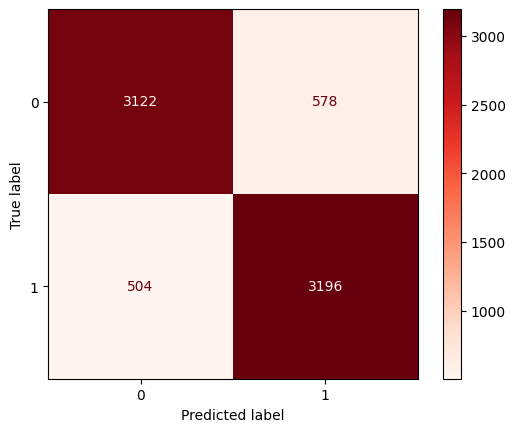

In [73]:
# hasil prediksi model setelah tuning pada Train-set
y_pred_train_finals = rf_randomcv_best.predict(X_train_balanced_new)

print('Recall Score - Train Set  : ', recall_score(y_train_balanced, y_pred_train_finals), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_train_balanced_new, y_train_balanced, cmap='Reds'))

Recall Score - Test Set  :  0.8259773013871374 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     11973
           1       0.36      0.83      0.50      1586

    accuracy                           0.81     13559
   macro avg       0.67      0.82      0.69     13559
weighted avg       0.90      0.81      0.84     13559
 

Confusion Matrix      : 


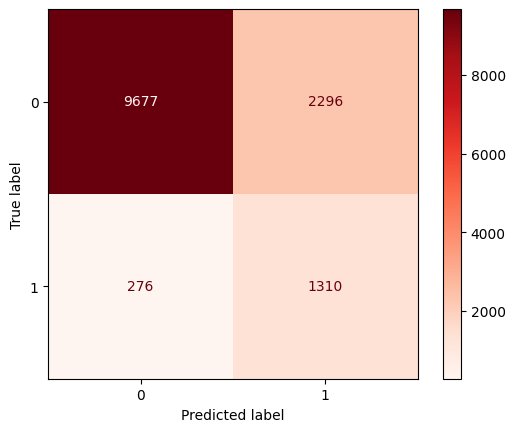

In [74]:
# training model setelah tuning pada Test-set
y_pred_test_finals = rf_randomcv_best.predict(X_test_new)

print('Recall Score - Test Set  : ', recall_score(y_test, y_pred_test_finals), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_test_new, y_test, cmap='Reds'))

In [75]:
# membuat fungsi report nilai hasil model akhir
all_reports = {}
def performance_report(all_reports, y_train_balanced, rf_train, y_test, rf_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train_balanced, rf_train),
      'train - recall' : recall_score(y_train_balanced, rf_train),
      'train - accuracy' : accuracy_score(y_train_balanced, rf_train),
      'train - f1_score' : f1_score(y_train_balanced, rf_train),
      'test - precision' : precision_score(y_test, rf_test),
      'test - recall' : recall_score(y_test, rf_test),
      'test - accuracy_score' : accuracy_score(y_test, rf_test),
      'test - f1_score' : f1_score(y_test, rf_test),
  }
  all_reports[name] = score_reports
  return all_reports

# report hasil model pada base model
all_reports = performance_report(all_reports, y_train_balanced, rf_train, y_test, rf_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.802862
test - f1_score,0.491342
test - precision,0.351867
test - recall,0.813997
train - accuracy,0.999595
train - f1_score,0.999595
train - precision,0.999190
train - recall,1.000000


In [76]:
# report hasil pada best model
all_reports = performance_report(all_reports, y_train_balanced, y_pred_train_finals, y_test, y_pred_test_finals, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.999190,0.846847
train - recall,1.000000,0.863784
train - accuracy,0.999595,0.853784
train - f1_score,0.999595,0.855231
test - precision,0.351867,0.363283
test - recall,0.813997,0.825977
test - accuracy_score,0.802862,0.810310
test - f1_score,0.491342,0.504622


- Nilai F1-score pada baseline model memiliki nilai train yang sangat bagus, tetapi pada test nilainya turun secara signifikan, ini menunjukkan adanya overfitting.
- Nilai F1-score pada best model memiliki nilai train yang menurun tapi tidak secara signifikan dari baseline model, F1-score pada test-set naik pada best model walaupun sedikit, tetapi tetap jauh dari train set. ini menunjukkan adanya overfitting.
- walaupun terdapat hasil yang overfit, nilai terbaik didapatkan pada model setelah dilakukan hyperperameter tuning atau best model. 

`Jadi saya akan menggunakan model ini untuk prediksi`

# ix. Model Saving

In [62]:
# fit pipeline dengan best model
rf_model = RandomForestClassifier(n_estimators= 50, min_samples_split= 10, max_depth= 20,criterion='entropy')
rf_model.fit(X_train_balanced_new, y_train_balanced)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       n_estimators=50)

In [63]:
# pipeline akhir dengan semua proses
full_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", rf_model)
])

full_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pdays', 'age']),
                                                 ('num1',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'balance']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'job']),
                                                 ('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['education']),
                                                 ('cat2',
                                                  Pipeline(steps=[('passthrough',
                                                                   None)]),
                                                  ['housing', 'loan'])])),
                ('classification',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        min_samples_split=10,
                                        n_estimators=50))])

In [64]:
# menyimpan pipeline untuk data inference
with open('full_process.pkl', 'wb') as file:
    pickle.dump((full_process), file)